In [1]:
import numpy as np
import sys 
sys.path.append("/home/pavnet/processing2/dataprocessingv2/code/")
import json

In [2]:
import station

In [3]:
with open('../config_params.json', 'r') as f:
    config = json.load(f)
    #print(json.dumps(config, indent=4))

buffersize = 3600*24 # seconds in a day
#localpath = config["localdb"]
dspconfig = config["DSP"]
ftpconfig = config["RedPitaya"]
dbconfig = config["DataBase"]
Txs = dspconfig["vlf_transmitters"].keys()
ftp = station.RPftp(ftpconfig)
sproc = station.dsp(dspconfig)

spectrum = np.zeros(sproc.fft_npts)
print("VLF TX", Txs)

 > SFTP is up
['PLO_2025_05_26_19_31_48h232790__7874.txt', 'PLO_2025_05_26_19_31_49h232789__7875.txt', 'PLO_2025_05_26_19_31_50h232790__7876.txt', 'PLO_2025_05_26_19_31_51h232795__7877.txt', 'PLO_2025_05_26_19_31_52h232788__7878.txt', 'PLO_2025_05_26_19_31_53h232792__7879.txt', 'PLO_2025_05_26_19_31_54h232807__7880.txt', 'PLO_2025_05_26_19_31_55h234085__7881.txt', 'PLO_2025_05_26_19_31_56h232798__7882.txt']
DSP Set Ok
VLF TX dict_keys(['NPM', 'NAA', 'NLK', 'NLM', 'NAU'])


In [4]:
dspconfig

{'sampling_frequency': 100000.0,
 'fft_npts': 8192,
 'method': 'overlap',
 'overlap_percent': 50,
 'ut_timeoffset': 5,
 'vlf_transmitters': {'NPM': 21400.0,
  'NAA': 24000.0,
  'NLK': 24800.0,
  'NLM': 25200.0,
  'NAU': 40750.0},
 'location': 'PLO',
 'localdb': 'datavlf',
 'clipping': False,
 'min_filesize': 80000}

In [37]:
available_files = [f for f in ftp.sftp.listdir(ftp.remote_path) if f not in ftp.buffer]
remote_file = ftp.remote_path +available_files[-1]
remf = ftp.sftp.open(remote_file,"+rb")
    

In [29]:
remf

In [30]:
remf.write("XXXX.txt")
remf.close()

In [32]:

import utils

In [38]:
s= utils.read_binary_IQ(remf)

In [39]:
s

array([[ 1.6381391,  4.3441553, -2.1853027, ...,  4.604065 , -1.4208057,
        -4.4144635],
       [ 4.4564157, -1.9169291, -4.222495 , ..., -1.1461307, -4.5100465,
         1.7092643]], dtype=float32)

In [8]:
import matplotlib.pyplot as plt

(-5.0, 5.0)

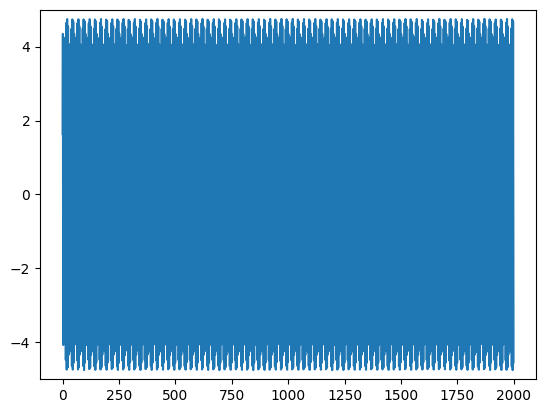

In [40]:
plt.plot(s[0,:2000])
plt.ylim(-5,5)

(10000.0, 27000.0)

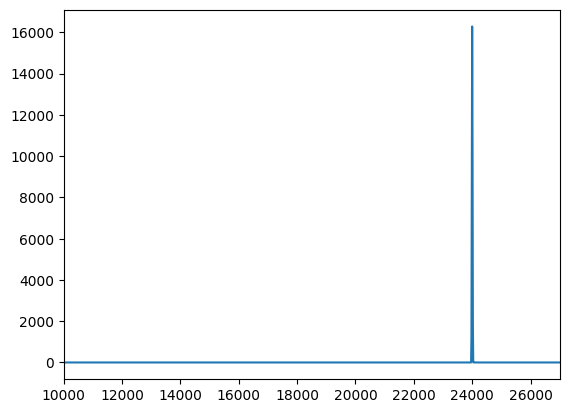

In [41]:
f = sproc.fft_method(s[0,:]+1j*s[1,:])
fx = np.arange(sproc.fft_npts)*sproc.sampling_freq/sproc.fft_npts
plt.plot(fx,f)
plt.xlim(10e3,27e3)

In [30]:
fx.shape, f.shape

((32768,), (8192,))

In [31]:
sproc.fft_npts

32768

In [19]:
with open("/home/pavnet/backup_pavnet_files/data4_juanref2/PLO_2025_05_14_19_42_18h192241__7.txt", "rb") as file:
    iq = utils.read_binary_IQ(file)

In [20]:
!ls "/home/pavnet/backup_pavnet_files/data4_juanref2/PLO_2025_05_14_19_42_18h192241__7.txt"

/home/pavnet/backup_pavnet_files/data4_juanref2/PLO_2025_05_14_19_42_18h192241__7.txt


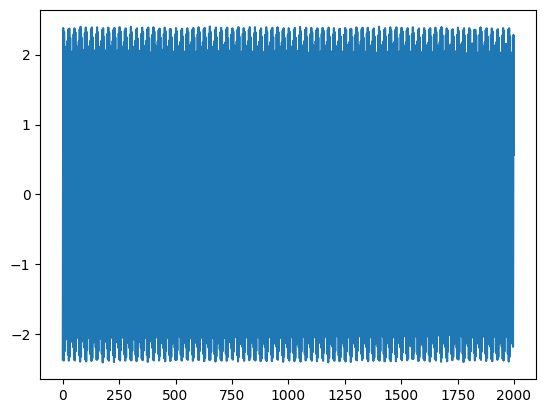

In [23]:
plt.plot(iq[0,:2000])

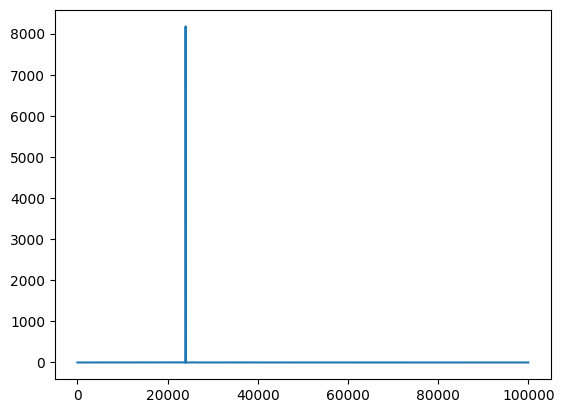

In [24]:
f = sproc.fft_method(iq[0,:]+1j*iq[1,:])
fx = np.arange(sproc.fft_npts)*sproc.sampling_freq/sproc.fft_npts
plt.plot(fx,f)
#plt.xlim(20e3,27e3)

In [ ]:
with open(